## Visualizando os conjuntos de dados
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 03/09/2020

A seguir temos uma maneira encontrada para ler os dados e também a visualização os dados usando a biblioteca matplotlib.

## Importando as bibliotecas usadas nas tarefas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

## Lendo os arquivos com numpy

### Visualizando o shape dos arquivos

Visualizar o shape dos arquivos lidos foi feito mais por uma questão de enteder como os arquivos estavam estruturados. por meio do caminho onde o arquivo está o código ler e mostra o seu shape. Com a visualzação do dos shapes dos dados é possível identificar que todos os dados estão em um array com dimensão 1 e n exemplos. O que indica que precisamos de um ajuste no shape dos arrays

In [2]:
for file_data in os.listdir('../dados/'):
    full_path = os.path.join('../dados/', file_data)
    array = np.fromfile(file=full_path)
    print("No arquivo", file_data, "tem", array.shape, "itens.")

No arquivo data0.txt tem (1800,) itens.
No arquivo data1.txt tem (1800,) itens.
No arquivo data2.txt tem (1800,) itens.
No arquivo data3.txt tem (1800,) itens.
No arquivo dataAll.txt tem (3000,) itens.
No arquivo dataHoldout.txt tem (2400,) itens.


### visualizando o conteúdo dos arquivos

Para entender melhor como ajustar os shapes dos arrays, tentou-se imprimir os arrays para visualizar qual é a nova forma que este array deve passar a ter.

In [3]:
for file_data in os.listdir('../dados/'):
    full_path = os.path.join('../dados/', file_data)
    array = np.fromfile(file=full_path)
    print(array)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]
[ 0.13658687 -0.16460088  0.         ...  0.99252852  1.06937678
  1.        ]
[ 0.00553719 -0.02079496  1.         ...  0.99828858  0.99300766
  0.        ]
[ 0.06162809 -0.1242566   0.         ...  1.05935906  0.93900834
  1.        ]
[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]
[-0.29322959 -0.09065359  1.         ...  0.72930655  0.93224271
  0.        ]


## Reshape dos conjuntos de dados

Após idenfiticar qual era o formato que o array deveria possuir e qual os shapes de cada um individualmente foram criadas duas funções uma que pega o caminho do arquivo e outra que muda o shape dos dados de acordo com o seu tamanho. A lista com o conjunto de dados com dimensões (n, 3) e o nome do aquivo em que o dado estava.

In [8]:
datasets = []
for file_data in os.listdir('../dados/'):
    full_path = os.path.join('../dados/', file_data)
    dataset = np.fromfile(full_path)
    try:
        number_samples = dataset.shape[0]//3
        dataset = dataset.reshape(number_samples, 3)
        datasets.append((dataset, file_data))
        print("Reshape realizado on arquivo:", file_data)
    except:
        print("Não foi possível realizar reshape no arquivo:", file_data)
print("\nLista de dados e nome dos arquivos:\n")  
print(datasets) 

Reshape realizado on arquivo: data0.txt
Reshape realizado on arquivo: data1.txt
Reshape realizado on arquivo: data2.txt
Reshape realizado on arquivo: data3.txt
Reshape realizado on arquivo: dataAll.txt
Reshape realizado on arquivo: dataHoldout.txt

Lista de dados e nome dos arquivos:

[(array([[-0.00149369, -0.03581784,  0.        ],
       [ 0.01234945,  0.10249524,  0.        ],
       [ 0.13954598,  0.05607083,  0.        ],
       ...,
       [ 0.95751872,  1.0035204 ,  1.        ],
       [ 0.97981588,  1.00949493,  1.        ],
       [ 1.02021556,  0.86533059,  1.        ]]), 'data0.txt'), (array([[ 0.13658687, -0.16460088,  0.        ],
       [-0.0228559 , -0.01094684,  0.        ],
       [-0.02654897,  0.00582183,  0.        ],
       ...,
       [ 0.99007304,  0.8921047 ,  1.        ],
       [ 0.91691441,  1.15684083,  1.        ],
       [ 0.99252852,  1.06937678,  1.        ]]), 'data1.txt'), (array([[ 0.00553719, -0.02079496,  1.        ],
       [ 0.12017245, -0.047952

## Plotando os conjutos de dados 

Usando a bilioteca matplotlib foram plotados os gráficos dos dados de cada arquivo dentro da pasta dados

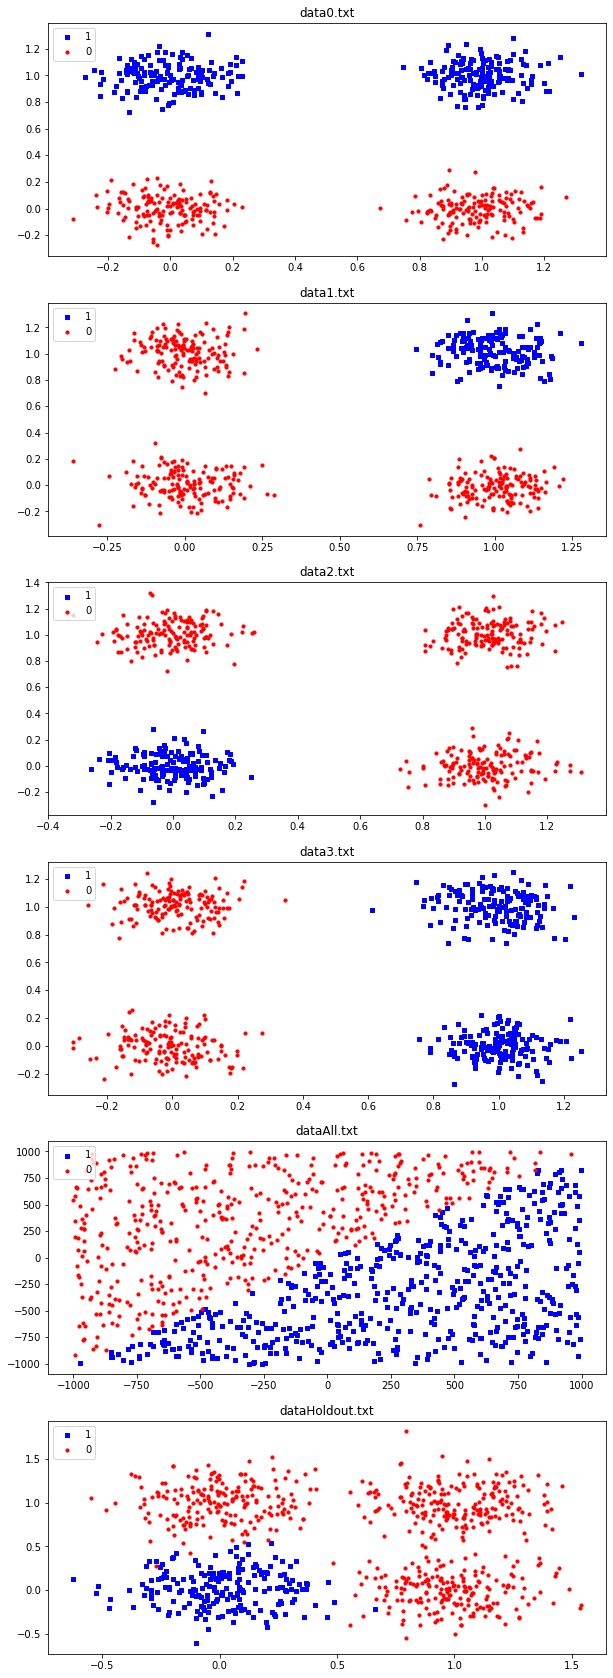

In [10]:
fig = plt.figure(figsize=(10, 30))
number_dataset = 1
for dataset, file_name in datasets:
   x = dataset[:,0]
   y = dataset[:,1]
   ax1 = fig.add_subplot(len(datasets),1,number_dataset)
   ax1.scatter(x[dataset[:,2] == 1.0], y[dataset[:,2] == 1.0], s=10, c='b', marker="s", label='1')
   ax1.scatter(x[dataset[:,2] == 0.0], y[dataset[:,2] == 0.0], s=10, c='r', marker="o", label='0')
   ax1.set_title(file_name)
   plt.legend(loc='upper left')
   number_dataset += 1
plt.savefig('../images/datasets.png')
plt.show()